# Is a commercial success the guarantee of a quality movie?

<a id='intro'></a>
## Introduction

Everyone does not have the same expectations when they go to see a movie.

Some people go to the movies for entertainment, others to get information and others just want to go out with friends.

The evaluation of the quality of a film leads to a multiplicity of opinions.

It is therefore not surprising that the quality of a commercially successful film is always debated.

Yet one could imagine that a film that is very successful must have the support of the majority of the audience.

However, it may be that the commercial achievement is only the consequence of a good trailer, good reviews or an excellent advertising campaign.

To propose an answer that is close to objectivity, we will use a database from The Movie Data base (TMDb).

TMDb's data includes 10,000 movies, as well as information on budgets, revenues, and the average rating of viewers.

*** Thus, we will be able to evaluate if the people have more appreciated the commercial successes or if the great financial performances are not a guarantee of quality. ***

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

In [1]:
# import statements 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# load data
df = pd.read_csv('tmdb-movies-new.csv')

#print out a few lines
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# return the shape of the DataFrame 
df.shape

(10866, 21)

It seems that we have more data than expected, our dataframe has 10 886 rows while we expected 10 001 rows.

***We need to check that our dataframe does not contain duplicate columns***

In [4]:
# return the sum of duplicate rows
sum(df.duplicated())

1

We have only one duplicate row.

Which does not explain the difference.

Maybe some rows are empty or almost empty, to check it ***we will evaluate the null-values of our data set.***

In [5]:
# return information on each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

The columns needed for our analysis do not contain any 'non-values'.

We also note that the data in these columns are in a usable format for our future calculations.

Before going any further, we need to make sure that the extra rows are usable, ***we'll check that the columns 'revenue', 'budget' and 'vote_count' do not contain a line equal to zero.***

Rows containing a value of zero are not exploitable.

In [6]:
# to quickly see if we have almost one row equal to 0 we use min()
print('budget : ',min(df['budget']), 'revenue : ', min(df['revenue']), 'vote_count : ', min(df['vote_count']))

budget :  0 revenue :  0 vote_count :  10


Thus, in the columns 'budget' and 'revenue' we have lines equal to 0, so we will have to delete them.

### Data Cleaning

By analysing the general properties of our data set we were able to identify 3 necessary steps to clean the data:

*** 1. Drop the duplicate row ***

*** 2. Drop the row with a 'budget' equal to zero ***

*** 3. Drop the row with a 'revenue' equal to zero ***

In [7]:
# drop duplicate row
df.drop_duplicates(inplace=True)

# confirme suppression, need to be equal to 0
sum(df.duplicated())

0

In [8]:
# suppress all the row with a budget equal to 0
df_c = df[df.budget != 0]

# suppress all the row with a revenue equal to 0
df_c = df_c[df_c.revenue !=0]

In [9]:
# return the shape 
df_c.shape

(3854, 21)

We thought we had 10,000 usable data, but once the data has been cleaned up, we realize that we only get 3,854 rows.

This strongly impacts the credibility of our analysis by reducing the size of our sample.

Nevertheless, the analysis of 3,853 films converse a certain interest

<a id='eda'></a>
## Exploratory Data Analysis

To explore the data we must:

*** 1. Calculate financial performance ***

*** 2. Remove outliers ***

*** 3. Observe the distribution ***

*** 4. Distinguish different levels of performance ***

### 1. Calculate financial performance

Financial performance is measured by taking into account expenses and revenues.

We can evaluate it through a ratio of revenue and budget columns.

A ratio fewer than 1 shows a failure and a ratio greater than 1 represents a success.

In [10]:
# create the column financial performance
df_c.loc[:, 'financial_performance'] = df_c['revenue']/df_c['budget']

# confirm the creation
df_c['financial_performance'].head(0)

Series([], Name: financial_performance, dtype: float64)

### 2. Remove Outliers

"In statistics, an outlier is an observation point that is distant from other observations.

An outlier may be due to variability in the measurement or it may indicate experimental error; the latter are sometimes excluded from the data set. 

An outlier can cause serious problems in statistical analyses." Source Wikipedia https://en.wikipedia.org/wiki/Outlier"

Thus, we need to suppress all outliers.

In [11]:
# function to supress outlier
def cut_the_tail(dataframe, column):
    '''
    the function take a dataframe and a column as argument 
    cut the outlier of the dataframe
    and return the new dataframe shape
    '''
    quantile_75 = dataframe[column].quantile(0.75)
    quantile_25 = dataframe[column].quantile(0.25)
    IQR = quantile_75 - quantile_25
    outlier_1 = quantile_25 - 1.5*IQR
    outlier_2 = quantile_75 + 1.5*IQR
    dataframe = dataframe.loc[((dataframe[column] > outlier_1) & (dataframe[column] < outlier_2))]
    return dataframe



# apply function to our dataframe
df_c = cut_the_tail(df_c,'financial_performance')

# confirm modification
df_c.shape

(3507, 22)

### 3. Observe the distribution

To observe the distribution, first we will create a scatterplot, then we will complete our analysis of the distribution by calling characteristics of the relationship between financial performance and average votes.

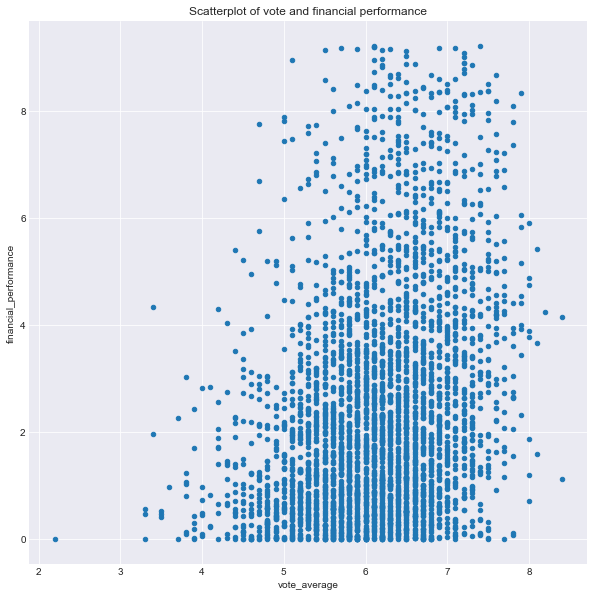

In [12]:
# create a scatterplot
df_c.plot(x='vote_average',y='financial_performance',title = 'Scatterplot of vote and financial performance',kind='scatter',figsize=(10,10))



*** The scatterplot does not show a strong relationship. ***
We can refine our perception of the relationship between variables using the correlation coefficient.

In [13]:
# correlation coefficient 
df_c['vote_average'].corr(df_c['financial_performance'])

0.29628074342750466

We can assume a weak uphill (positive) linear relationship

### 4. Distinguish different levels of performance

We will distinguish different types of economic performance.

This will also allow us to compare the average scores of the different groups.

*** We will proceed in 2 times: ***

*** a. Define levels of economic performance. ***

To define the different levels we will use the quartiles

In [14]:
# return quartiles with describe
df_c['financial_performance'].describe()

count    3.507000e+03
mean     2.404494e+00
std      2.078287e+00
min      2.400000e-07
25%      7.974869e-01
50%      1.882155e+00
75%      3.408239e+00
max      9.210474e+00
Name: financial_performance, dtype: float64

We define performance levels as follows:
- between min and 25% = poor
- between 25% and 50% = bad
- between 50% and 75% = good
- between 75% and max = success

In [15]:
# create the column level and evaluate each rows
bin_edges = [2.400000e-07,7.974869e-01,1.882155e+00,3.408239e+00,9.210474e+00]
bin_names =['poor','bad','good', 'success']
df_c['level']=pd.cut(df_c['financial_performance'],bin_edges,labels=bin_names)

# confirm column creation
df_c.head(0)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,financial_performance,level


<a id='conclusions'></a>
## Conclusions

To answer our question, at first we will compare the average scores obtained according to the different levels of performance.
Then, in a second time we will compare the proportion of each note according to the levels of performances.

### 1. Average rating according to levels

In [16]:
# select level
poor = df_c[df_c['level']=='poor']
bad = df_c[df_c['level']=='bad']
good = df_c[df_c['level']=='good']
success = df_c[df_c['level']=='success']



In [17]:
# mean of each levels
poor_m = poor['vote_average'].mean()
bad_m = bad['vote_average'].mean()
good_m = good['vote_average'].mean()
success_m = success['vote_average'].mean()


poor_m, bad_m, good_m, success_m

(5.829566210045663, 6.037514253135689, 6.147488584474886, 6.481870011402507)

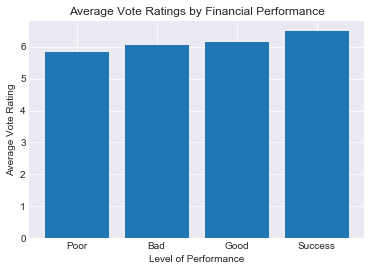

In [18]:
# Create a bar chart
locations = [1, 2, 3, 4]
heights = [poor_m, bad_m, good_m, success_m]
labels = ['Poor', 'Bad', 'Good','Success']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Vote Ratings by Financial Performance')
plt.xlabel('Level of Performance')
plt.ylabel('Average Vote Rating')

In our sample, we can observe that the average score increases with the level of success.
We also find that the note difference is small.
The difference between the lowest and the highest level is only 0.65.
The relationship between notes and bugets is positive but weak.

We will refine our analysis by comparing the proportion of each grade by level.

### 2. Proportion of each grade by level

In [19]:
#convert vote_average to improve visibility
df_c['vote_average'] = df.vote_average.astype(int)

In [20]:
# average financial performance for each vote average
df_c.groupby('vote_average')['financial_performance'].mean()


vote_average
2    0.001134
3    0.979893
4    1.286917
5    1.906538
6    2.579218
7    3.537014
8    3.368399
Name: financial_performance, dtype: float64

In [21]:
# get counts for each rating and level
level_counts = df_c.groupby(['level', 'vote_average']).count()['financial_performance']
level_counts

level    vote_average
poor     2                 1.0
         3                14.0
         4               110.0
         5               347.0
         6               348.0
         7                55.0
         8                 1.0
bad      2                 NaN
         3                 6.0
         4                53.0
         5               330.0
         6               399.0
         7                85.0
         8                 4.0
good     2                 NaN
         3                 4.0
         4                40.0
         5               293.0
         6               416.0
         7               123.0
         8                 NaN
success  2                 NaN
         3                 1.0
         4                16.0
         5               181.0
         6               436.0
         7               234.0
         8                 9.0
Name: financial_performance, dtype: float64

In [22]:
# get total counts for each color
level_totals = df_c.groupby('level').count()['financial_performance']

In [23]:
# get proportion
poor_proportions = level_counts['poor'] / level_totals['poor']
bad_proportions = level_counts['bad'] / level_totals['bad']
good_proportions = level_counts['good'] / level_totals['good']
success_proportions = level_counts['success'] / level_totals['success']


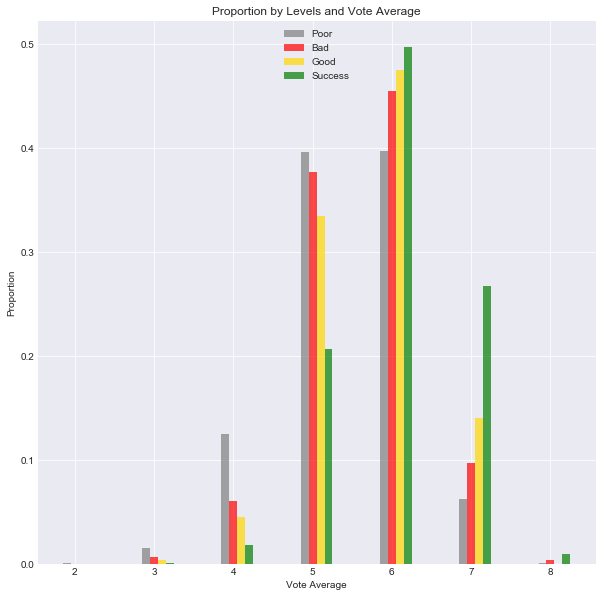

In [24]:
# plot bars

ind = np.arange(len(poor_proportions))  # the x locations for the groups
width = 0.1       # the width of the bars

plt.figure(figsize=(10,10))

poor_bars = plt.bar(ind, poor_proportions, width, color='gray', alpha=.7, label='Poor')
bad_bars = plt.bar(ind + width, bad_proportions, width, color='red', alpha=.7, label='Bad')
good_bars = plt.bar(ind + width*2, good_proportions, width, color='gold', alpha=.7, label='Good')
success_bars = plt.bar(ind + width*3, success_proportions, width, color='g', alpha=.7, label='Success')

plt.ylabel('Proportion')
plt.xlabel('Vote Average')
plt.title('Proportion by Levels and Vote Average')
locations = ind + width   # xtick locations
labels = ['2','3', '4', '5', '6', '7', '8']  # xtick labels
plt.xticks(locations, labels)
# legend
plt.legend()

Is a commercial success the guarantee of a quality movie?

The exploration of the data shows us that there is a positive link between the quality of a film and its commercial success.

However, this link is weak and not always necessary (movies that have experienced a commercial failure may have been appreciated), in our sample.

To go further in the analysis, it would be interesting to have a larger sample of data and to categorize the movies.

For example, one might try to see if the relationship between commercial success and the appreciation of a film by the general public, evolves according to the popularity of movie genres.

#### Limitations of the Data Set 

Our conclusion is limited for quantitative and qualitative reasons.
- Quantitative: the size of our sample is too small to generalize.
- Qualitative: the ratings come from TMDb users and is therefore limited to the demographics of platform users.

In [27]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0